In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')

In [3]:
df.head(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN


In [4]:
## 1. Data Cleaning
## 2. EDA
## 3. Text Processing
## 4. Model Building
## 5. Evaluation
## 6. Improvement
## 7. Websiste
## 8. Deploy

# 1. Data Cleaning

In [5]:
# Dropping Irrelevant Columns
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [6]:
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [7]:
df = df.rename(columns={'v1':'target','v2':'message'})

In [8]:
df.head(2)

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
# Label Encoding
label = LabelEncoder()
df['target'] = label.fit_transform(df['target'])

In [11]:
df.sample(2)

,target,message
4228,0,Have you bookedthe hut? And also your time off...
207,0,"Aight yo, dats straight dogg"


In [12]:
#Missing Values
df.isnull().sum(), df.isna().sum()

(target     0
 message    0
 dtype: int64,
 target     0
 message    0
 dtype: int64)

In [13]:
#Duplicate Values
df.duplicated().sum()

403

In [14]:
#Drop Duplicates
df = df.drop_duplicates()

In [15]:
df.duplicated().sum()

0

# Exploratory Data Analysis

In [16]:
df.head(2)

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


([<matplotlib.patches.Wedge at 0x7f428dc3ba00>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'Not Spam'),
  Text(1.014499764949479, -0.4251943401757036, 'Spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

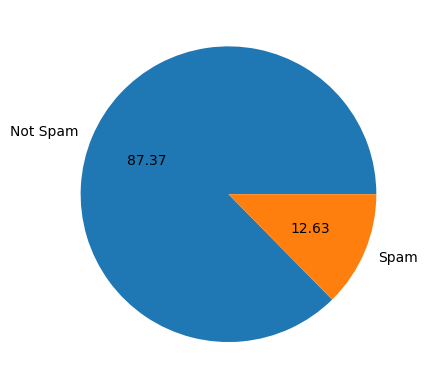

In [17]:
plt.pie(df['target'].value_counts(),labels=['Not Spam','Spam'],autopct='%0.2f')

In [18]:
#From the above pie chart it is evident that data is imbalanced

In [19]:
!pip install nltk

In [20]:
import nltk

In [21]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
df['num_chars'] = df['message'].apply(len)

In [23]:
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:

df['num_sents'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head(2)

,target,message,num_chars,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [26]:
#No. of characters, words and sentences in the messages
df[['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
#No. of characters, words and sentences in the messages on Not Spam
df[df['target'] == 0][['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
#No. of characters, words and sentences in the messages on Not Spam
df[df['target'] == 1][['num_chars','num_words','num_sents']].describe()

,num_chars,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [29]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

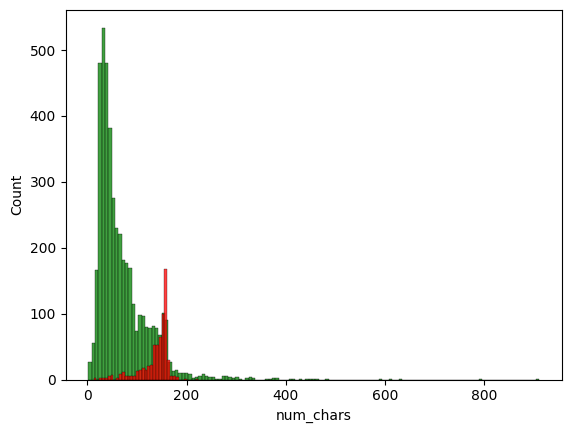

In [30]:
sns.histplot(df[df['target'] == 0]['num_chars'],color='green')
sns.histplot(df[df['target'] == 1]['num_chars'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

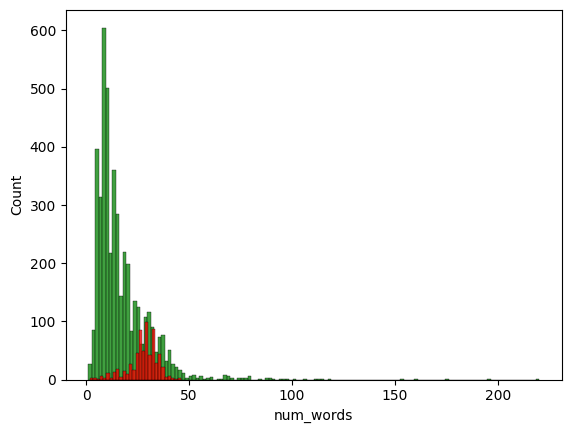

In [31]:
sns.histplot(df[df['target'] == 0]['num_words'],color='green')
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

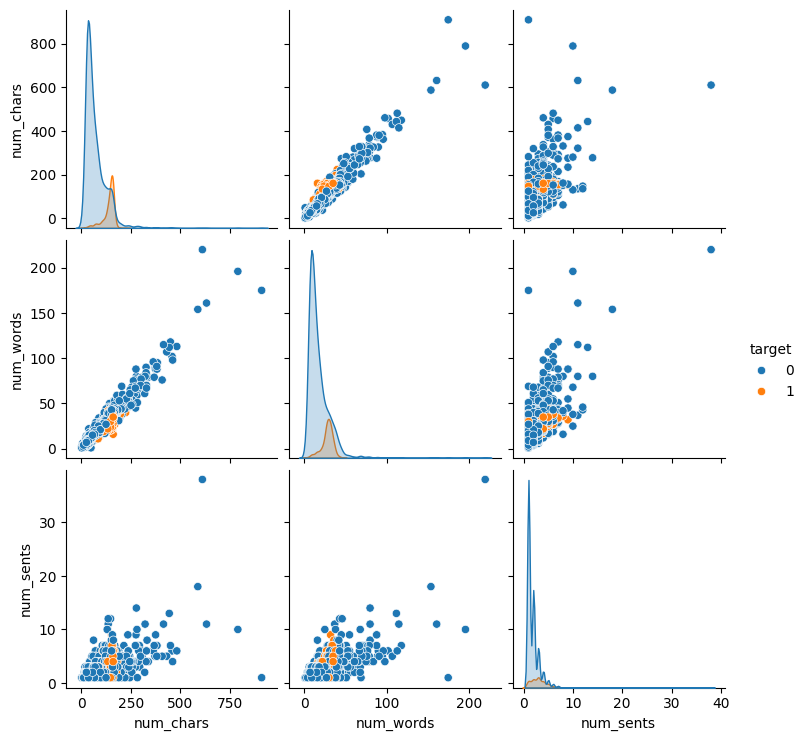

In [32]:
sns.pairplot(df,hue='target')

<Axes: >

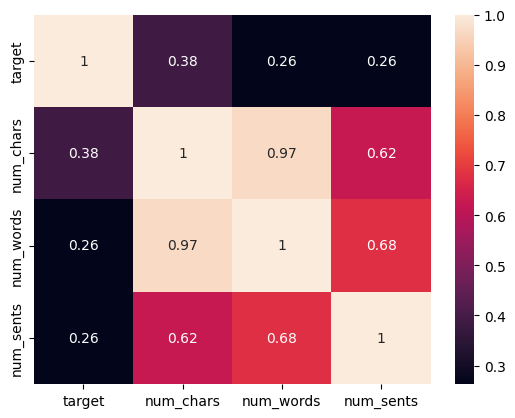

In [33]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Preprocessing
### Lower Case
### Tokenization
### Remoiving Special Characters
### Removing Stop Words and Punctuation
### Stemming

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
import string

In [36]:
from nltk.stem.porter import PorterStemmer

In [37]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in nltk.corpus.stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  ps = PorterStemmer()
  for i in text:
    y.append(ps.stem(i))

  return ' '.join(y)


In [38]:
transform_text('Hello. Thanking God!')

'hello thank god'

In [39]:
df['transformed_text'] = df['message'].apply(transform_text)

In [40]:
df.head(2)

,target,message,num_chars,num_words,num_sents,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


# Model Building

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [42]:
y = df['target'].values

In [43]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [44]:

from sklearn.metrics import roc_curve, accuracy_score, precision_score, confusion_matrix

In [45]:
bnb = BernoulliNB()
mnb = MultinomialNB()
gnb = GaussianNB()
svc = SVC()
log = LogisticRegression()
dtc = DecisionTreeClassifier()

In [46]:
models = [bnb, mnb, gnb, svc, log, dtc]

In [47]:
bnb_p = {'alpha' : [0.5,1.0]}
mnb_p = {'alpha' : [0.5,1.0]}
gnb_p = {'priors' : [None]}
svc_p = {'kernel' : ['rbf']}
log_p = {'C' :[0.3,0.5]}
dtc_p = {'max_depth':[3]}

In [48]:
params = [bnb_p, mnb_p, gnb_p, svc_p, log_p, dtc_p]

In [49]:
skfold = StratifiedKFold(n_splits=5)

In [50]:
for i in range(len(models)):
  model = models[i]
  param = params[i]
  grid = GridSearchCV(model,param,cv=skfold)
  score = grid.fit(X,y)
  print(score.best_params_,'<--->',score.best_estimator_)
  print('************************************************')

{'alpha': 0.5} <---> BernoulliNB(alpha=0.5)
************************************************
{'alpha': 0.5} <---> MultinomialNB(alpha=0.5)
************************************************
{'priors': None} <---> GaussianNB()
************************************************
{'kernel': 'rbf'} <---> SVC()
************************************************
{'C': 0.5} <---> LogisticRegression(C=0.5)
************************************************
{'max_depth': 3} <---> DecisionTreeClassifier(max_depth=3)
************************************************


In [51]:
bnb_best = {'alpha': [0.5]}
mnb_best = {'alpha': [0.5]}
gnb_best = {'priors' : [None]}
svc_best = {'kernel' : ['rbf']}
log_best = {'C':[0.5]}
dtc_best = {'max_depth' : [3]}

In [52]:
bests = [bnb_best, mnb_best, gnb_best, svc_best, log_best, dtc_best]

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [54]:
for i in range(len(models)):
  model = models[i]
  best = bests[i]
  grid = GridSearchCV(model,best,cv=skfold)
  grid.fit(X_train,y_train)
  y_pred = grid.predict(X_test)
  print(model,'----',best,'---',accuracy_score(y_test,y_pred),'---',precision_score(y_test,y_pred))
  print('*****************************************************************************************')


BernoulliNB() ---- {'alpha': [0.5]} --- 0.9767981438515081 --- 0.9698795180722891
*****************************************************************************************
MultinomialNB() ---- {'alpha': [0.5]} --- 0.9706109822119103 --- 0.9868421052631579
*****************************************************************************************
GaussianNB() ---- {'priors': [None]} --- 0.8692962103634957 --- 0.5288135593220339
*****************************************************************************************
SVC() ---- {'kernel': ['rbf']} --- 0.9667440061871616 --- 0.993103448275862
*****************************************************************************************
LogisticRegression() ---- {'C': [0.5]} --- 0.9156999226604795 --- 0.9325842696629213
*****************************************************************************************
DecisionTreeClassifier() ---- {'max_depth': [3]} --- 0.9195668986852281 --- 0.8306451612903226
*********************************************

In [ ]:
# According to the results above, Multinomial Naive Bayes is performing best and therefore we choose it

In [55]:
multi_nb = MultinomialNB(alpha=0.5)
multi_nb.fit(X_train,y_train)
m_pred = multi_nb.predict(X_test)

In [56]:
accuracy_score(y_test,m_pred), precision_score(y_test,m_pred)

(0.9706109822119103, 0.9868421052631579)

In [57]:
confusion_matrix(y_test,m_pred)

array([[1105,    2],
       [  36,  150]])

In [58]:
import pickle

In [59]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(multi_nb,open('model.pkl','wb'))